In [308]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import pandas as pd

from mpl_finance import candlestick_ohlc

In [309]:
filename = r'../data/aapl.csv'
df = pd.read_csv(filename)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [310]:
dt = datetime.strptime('2008-10-14', '%Y-%m-%d')
dt.timestamp()

1223913600.0

In [311]:
# Map the column date to the appropriate format
df['Date'] = df['Date'].apply(lambda dt: datetime.strptime(dt, '%Y-%m-%d').timestamp())

ohlc = df[['Date','Open','High','Low','Close']]
ohlc.head()

,Date,Open,High,Low,Close
0,1.223914e+09,116.26,116.40,103.14,104.08
1,1.223827e+09,104.55,110.53,101.02,110.26
2,1.223568e+09,85.70,100.00,85.00,96.80
3,1.223482e+09,93.35,95.80,86.60,88.74
4,1.223395e+09,85.91,96.33,85.68,89.79


In [312]:
ohlc = ohlc.head(20)

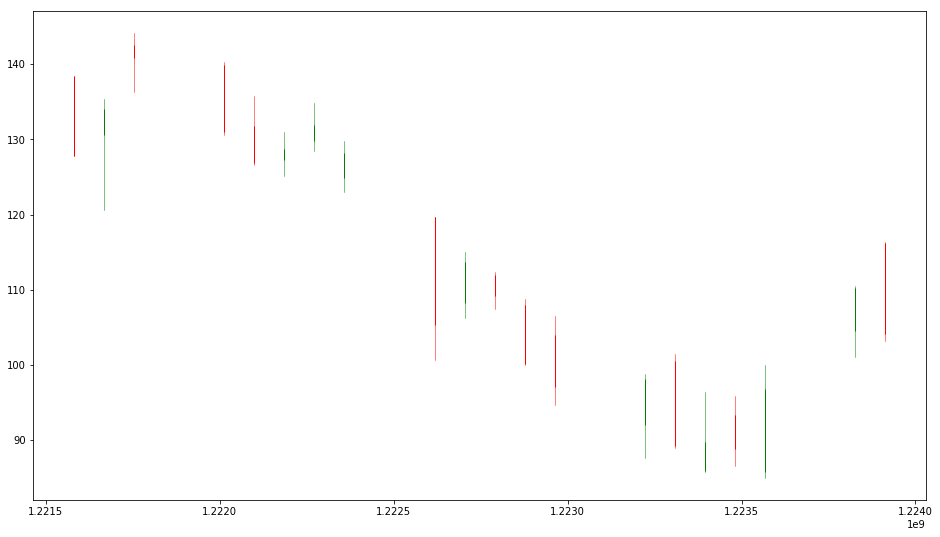

In [313]:
f1, ax = plt.subplots(figsize = (16,9))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=2, colorup='green', colordown='red')

plt.show()

In [314]:
from matplotlib.collections import PatchCollection, LineCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D, TICKLEFT, TICKRIGHT

import numpy as np
import math

          Date    Open    High     Low   Close
19  2008-09-17  138.49  138.51  127.83  127.83
18  2008-09-18  130.57  135.43  120.68  134.09
17  2008-09-19  142.60  144.20  136.31  140.91
16  2008-09-22  139.94  140.25  130.66  131.05
15  2008-09-23  131.85  135.80  126.66  126.84


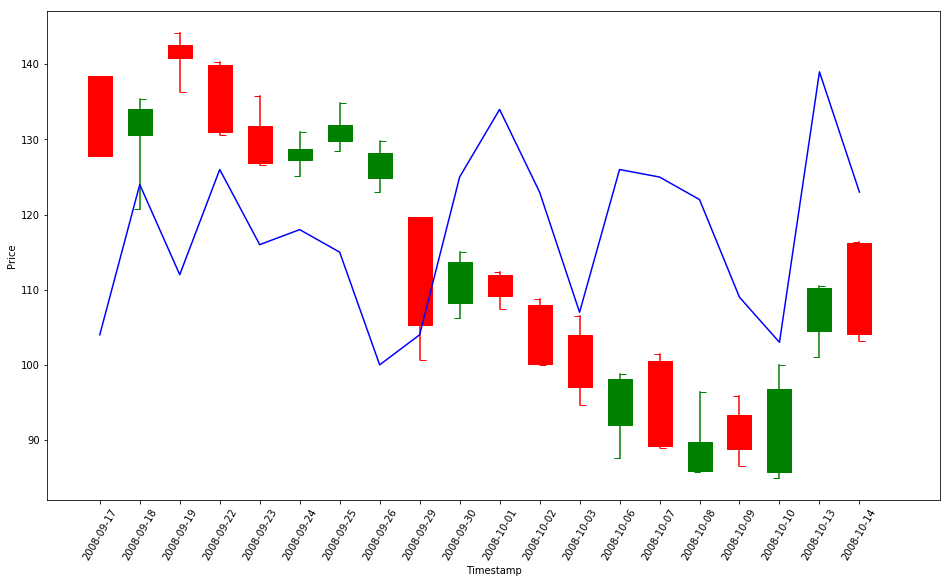

In [315]:
def readable_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')

def candlestick(ax, x, y, xlabel, ylabel, w=1.0):
    n = len(x)
    alpha = 1
    miny, maxy = math.inf, -math.inf
    minx, maxx = 0, n

    for i in range(0, n):
        Date, Open, High, Low, Close = y[i]
        is_green = Close >= Open
        h = abs(Open - Close)
        xpos = i - w / 2
        ypos = min(Open, Close)

        if Low < miny:
            miny = Low
        if High > maxy:
            maxy = High

        # Plot the open/close lines
        ytop, ybtm = Open, Close
        color = 'red'
        toptick, btmtick = TICKLEFT, TICKRIGHT
        toph, btmh = High - Open, Close - Low
        if is_green:
            ytop, ybtm = ybtm, ytop
            color = 'green'
            toptick, btmtick = btmtick, toptick
            toph, btmh = High - Close, Open - Low

        # Draw the rectangle from bottom left
        rect = Rectangle((xpos, ypos), 
                         w, 
                         h, 
                         color=color)
        ax.add_patch(rect)

        # Top line
        tline = Line2D(xdata=(i, i),
                       ydata=(ytop, ytop + toph),
                       marker=toptick,
                       color=color,
                       alpha=alpha)
        ax.add_line(tline)

        # Bottom line
        bline = Line2D(xdata=(i, i),
                       ydata=(ybtm, ybtm - btmh),
                       marker=btmtick,
                       color=color,
                       alpha=alpha)
        ax.add_line(bline)

    # Min and max corners respectively
    corners = (minx, miny), (maxx, maxy)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks([i for i, _ in enumerate(x)], 
                  minor=False)
    ax.set_xticklabels([dt for dt in x])

    ax.update_datalim(corners)
    ax.autoscale_view()
    
ohlc = ohlc.sort_values('Date')
ohlc['Date'] = ohlc['Date'].apply(readable_date)

print(ohlc.head())
data = ohlc.values

x = ohlc['Date'].values # np.arange(0, n, 1)
y = data

fig, ax = plt.subplots(1, figsize=(16, 9))
candlestick(x=x, 
            y=y, 
            ax=ax, 
            w=0.6,
            xlabel='Timestamp',
            ylabel='Price')
plt.xticks(rotation=60)

x2 = np.arange(0, n, 1)
y2 = [np.random.randint(100, 140) for _ in range(0, 20)]
ax.plot(x2, y2, 'b')
plt.show()